In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# read datasdet using pandas
raw_data = pd.read_csv('../datasets/csv/action_movie_data.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52452 entries, 0 to 52451
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_id     52452 non-null  object 
 1   movie_name   52451 non-null  object 
 2   year         44193 non-null  object 
 3   certificate  13668 non-null  object 
 4   runtime      32530 non-null  object 
 5   genre        52452 non-null  object 
 6   rating       29448 non-null  float64
 7   description  52452 non-null  object 
 8   director     47819 non-null  object 
 9   director_id  47819 non-null  object 
 10  star         43212 non-null  object 
 11  star_id      44621 non-null  object 
 12  votes        29450 non-null  float64
 13  gross(in $)  2760 non-null   float64
dtypes: float64(3), object(11)
memory usage: 5.6+ MB


In [45]:
# number of missing values
raw_data.isnull().sum()

movie_id           0
movie_name         1
year            8259
certificate    38784
runtime        19922
genre              0
rating         23004
description        0
director        4633
director_id     4633
star            9240
star_id         7831
votes          23002
gross(in $)    49692
dtype: int64

# Raw Data Analysis

We will be performing analysis on the following columns to get a deeper understanding what data we are dealing with, and how we can go about making the data better:
- year
- certificate
- runtime
- director(s)
- stars
- rating

The rest of the columns that are not mentioned above are not going to be considered to be in our dataset, due to not providing any meaningful information for rating prediction, and will be removed during data preprocessing.

## Year

Our main objectives is to understand what time period the majority of our movie data is located in, any weird or missing values, and the distribution of the data.

**Analysis**:
- Majority of our movie data is located in the 2010s to 2020s range.
- We are some weird roman numerals that needed to be removed.
- There are distinct periods in cinema where film are drastically changed and film historians have studied extensively on this. Due to the nature of our problem, historical films (before 2000s) could potentially serve as noise to predictions for future films, since film has significantly over the past century. We are mainly interested in contemporary film ratings, so we will be ranging our data from 2000s onwards.

In [46]:
raw_data['year'].describe()

count     44193
unique      157
top        2017
freq       1354
Name: year, dtype: object

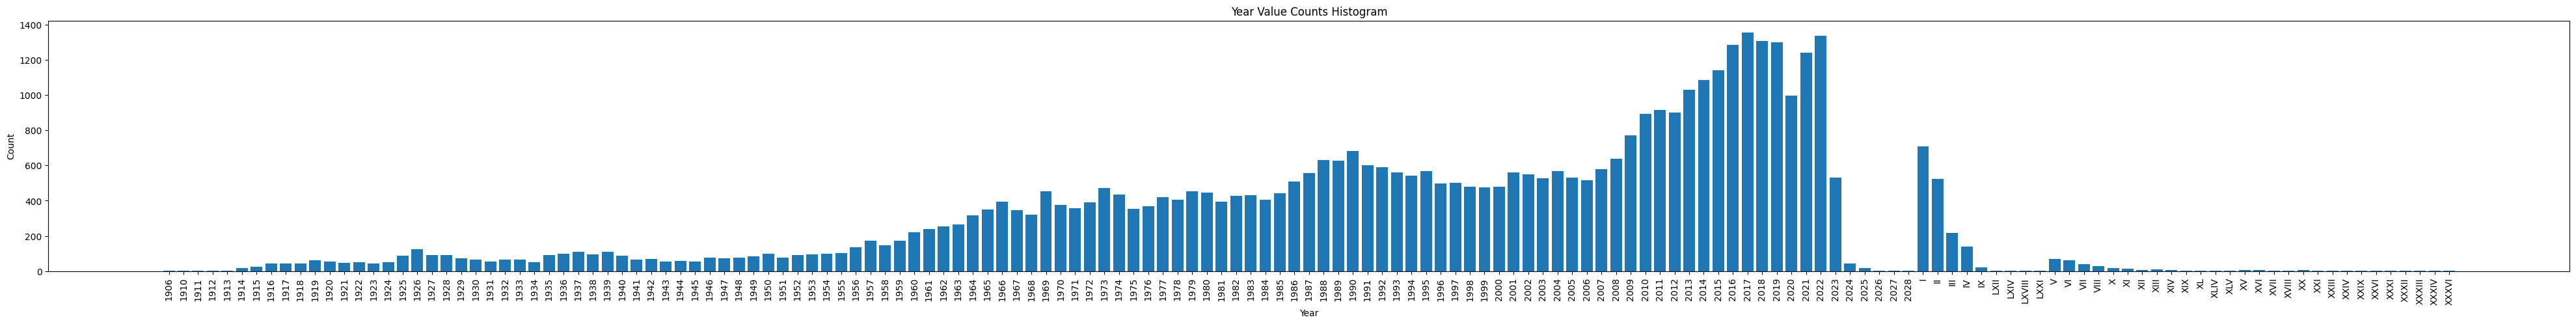

In [47]:
# Get year_counts
year_counts = raw_data['year'].value_counts().sort_index()

# Create a histogram of the year column
plt.figure(figsize=(50,5)) # adjust the figure size

# Create a bar chart with vertical x-axis labels
plt.bar(year_counts.index, year_counts.values)
plt.xticks(year_counts.index, rotation='vertical')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year Value Counts Histogram')

# Show the plot
plt.show()

## Certificates

Our main objectives is to understand what are the different kinds of certificates we have, any weird or missing values, and the distribution of the data. We also know the different countries issue different certifcates to the same movie, so this will be good to know if we need to restrict region of movies, as well.

**Analysis**:
- Lots of missing values for certificates
- The biggest frequent label is "Not Rated", which is good as a missing value
- The second biggest movie is R-rated, which makes sense, since this is an action movie dataset.
- Since we have a lot of missing certifications, it would probably hurt the model to remove all rows that have NA certification values, so we may opt for removing the certification column all together.

In [48]:
raw_data['certificate'].describe()

count         13668
unique           30
top       Not Rated
freq           4364
Name: certificate, dtype: object

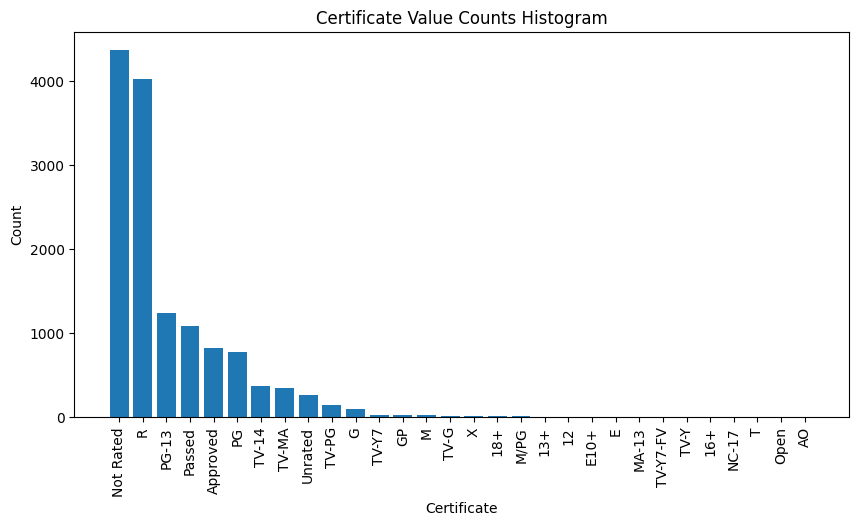

In [49]:
# Get certificate_counts
certificate_counts = raw_data['certificate'].value_counts()

# Create a histogram of the year column
plt.figure(figsize=(10,5)) # adjust the figure size

# Create a bar chart with vertical x-axis labels
plt.bar(certificate_counts.index, certificate_counts.values)
plt.xticks(certificate_counts.index, rotation='vertical')

# Add labels and title
plt.xlabel('Certificate')
plt.ylabel('Count')
plt.title('Certificate Value Counts Histogram')

# Show the plot
plt.show()

## Runtime

Our main objectives is to understand the distribution of movie runtimes and any weird or missing values.

**Analysis**:
- Majority of movies in the dataset are 30 mins or less (short films)
- There are a few outliers (such as 999 mins). Will most likely have to manually remove this outliers, as it's a good chance it's noise.
- According to general stats, most American movies are between 80-120 mins, which doesn't fit this data. Might need to limit to a certain region, in that case...

In [50]:
raw_data['runtime'].describe()

count      32530
unique       266
top       90 min
freq        2717
Name: runtime, dtype: object

In [51]:
runtime = raw_data['runtime']
runtime = runtime.fillna('0')
runtime = runtime.str.extract('(\d+)').astype(int)
runtime.describe()

,0
count,52452.000000
mean,62.607336
std,54.562408
min,0.000000
25%,0.000000
50%,83.000000
75%,99.000000
max,999.000000


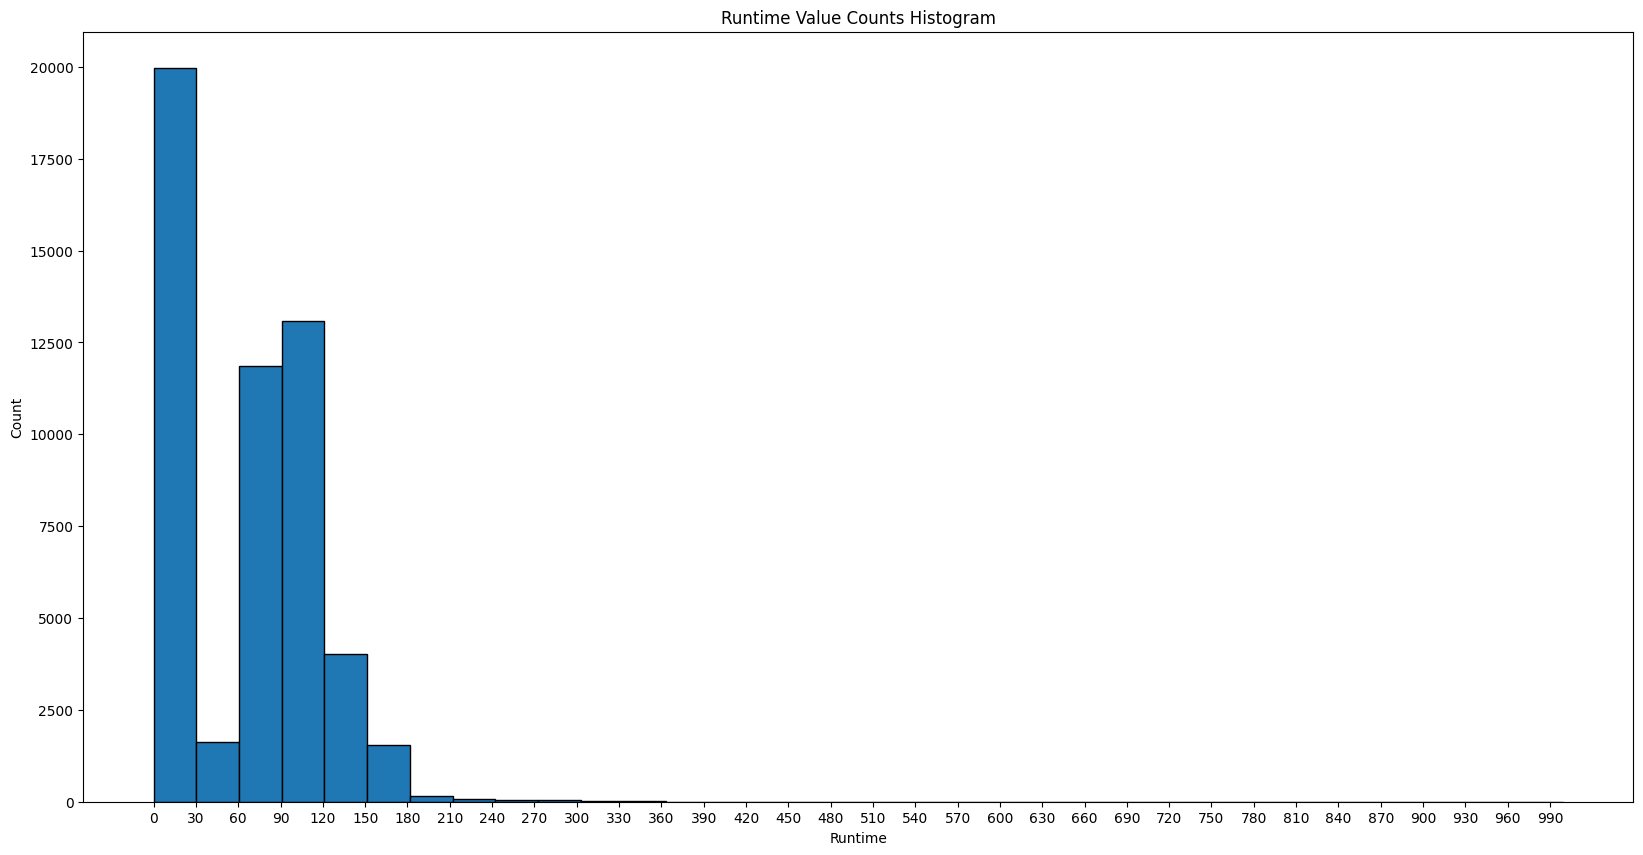

In [52]:
# adjust the figure size
plt.figure(figsize=(20,10)) 

# Create a hist chart
plt.hist(runtime, bins=33, edgecolor='black')

# Set the x-ticks and labels
ticks = np.arange(0, 1000, 30)
labels = ticks.astype(str)
plt.xticks(ticks, labels)

# Add labels and title
plt.xlabel('Runtime')
plt.ylabel('Count')
plt.title('Runtime Value Counts Histogram')

# Show the plot
plt.show()

## Director(s)

Our main objectives is to understand the distribution of the movies directors made movies and any weird or missing values.

**Analysis**:
- Over 30k directors in the dataset (*too large to display a graph, so displayed top 30 directors instead*)
- A lot of the top directors are not American directors

In [53]:
directors = raw_data['director']
directors = directors.str.replace('\n', '').str.strip() # Replace newlines with empty strings and strip trailing spaces
directors = directors.str.split(',') # Split the strings on ','
directors = directors.explode()
directors.describe()

count          55301
unique         30005
top       Godfrey Ho
freq             129
Name: director, dtype: object

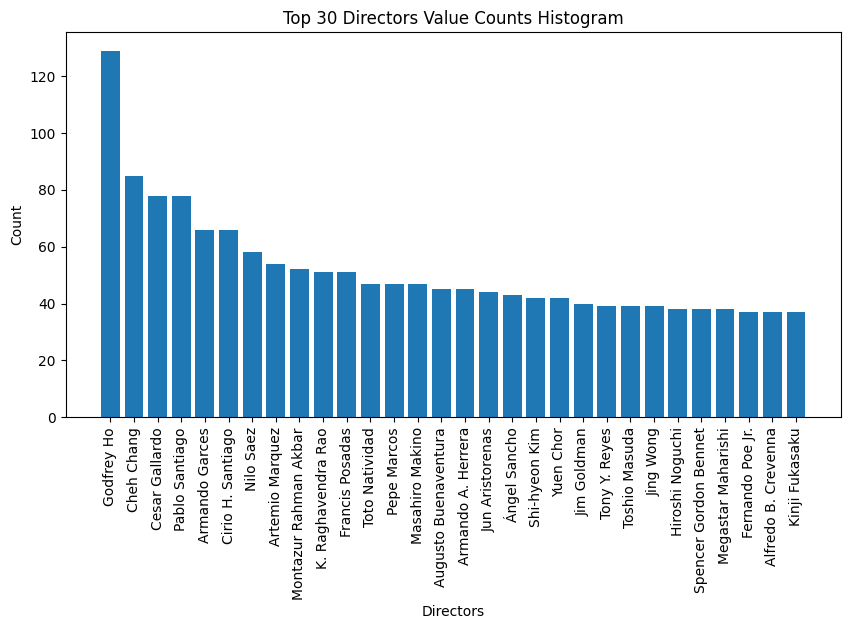

In [54]:
# Get director counts
director_counts = directors.value_counts().sort_values(ascending=False)
director_counts = director_counts.head(30)

# adjust the figure size
plt.figure(figsize=(10,5)) 

# # Create a histogram of the directors with vertical x-axis labels
plt.bar(director_counts.index, director_counts.values)
plt.xticks(director_counts.index, rotation='vertical')

# Add labels and title
plt.xlabel('Directors')
plt.ylabel('Count')
plt.title('Top 30 Directors Value Counts Histogram')

# Show the plot
plt.show()

## Stars

Our main objectives is to understand the distribution of the stars in movies and any weird or missing values.

**Analysis**:
- Same observations as for Directors

In [55]:
stars = raw_data['star']
stars = stars.str.replace('\n', '').str.strip() # Replace newlines with empty strings and strip trailing spaces
stars = stars.str.split(',') # Split the strings on ','
stars = stars.explode()
stars.describe()

count            166036
unique            87902
top        Paquito Diaz
freq                196
Name: star, dtype: object

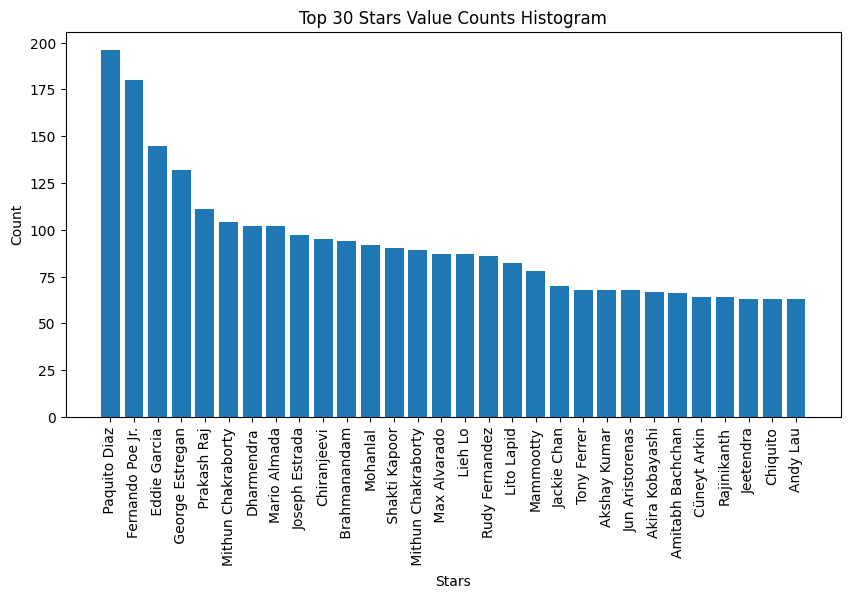

In [56]:
# Get stars counts
star_counts = stars.value_counts().sort_values(ascending=False)
star_counts = star_counts.head(30)

# adjust the figure size
plt.figure(figsize=(10,5))

# # Create a histogram of the directors with vertical x-axis labels
plt.bar(star_counts.index, star_counts.values)
plt.xticks(star_counts.index, rotation='vertical')

# Add labels and title
plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('Top 30 Stars Value Counts Histogram')

# Show the plot
plt.show()

## Rating

Our main objectives is to understand the distribution of the ratings for movies (*this is our output variable*) and any weird or missing values. The distribution of ratings will tell us whether we should continue this as a regression problem or classification problem

**Analysis**:
- The ratings are approximately normally distributed, which is a good sign.
- Since majority of the data is centered between 5-6, if we want to do classification labels, we would have to use quantiles of the data to ensure class balance, however, it would be a weird criteria for a end user to understand a rating prediction. For example, if we want to split the ratings into 4 categories and want to preserve class balance, we would do:
  - 0 to 4.8: Poor
  - 4.8 - 5.8: Below Average
  - 5.8 - 6.6: Above Average
  - 6.6 - 10: Excellent
- We could try different class ranges to see what best improves the accuracies of various models


In [57]:
ratings = raw_data['rating']
ratings = ratings.astype(float)
ratings.describe()

count    29448.000000
mean         5.697755
std          1.359132
min          1.100000
25%          4.800000
50%          5.800000
75%          6.600000
max         10.000000
Name: rating, dtype: float64

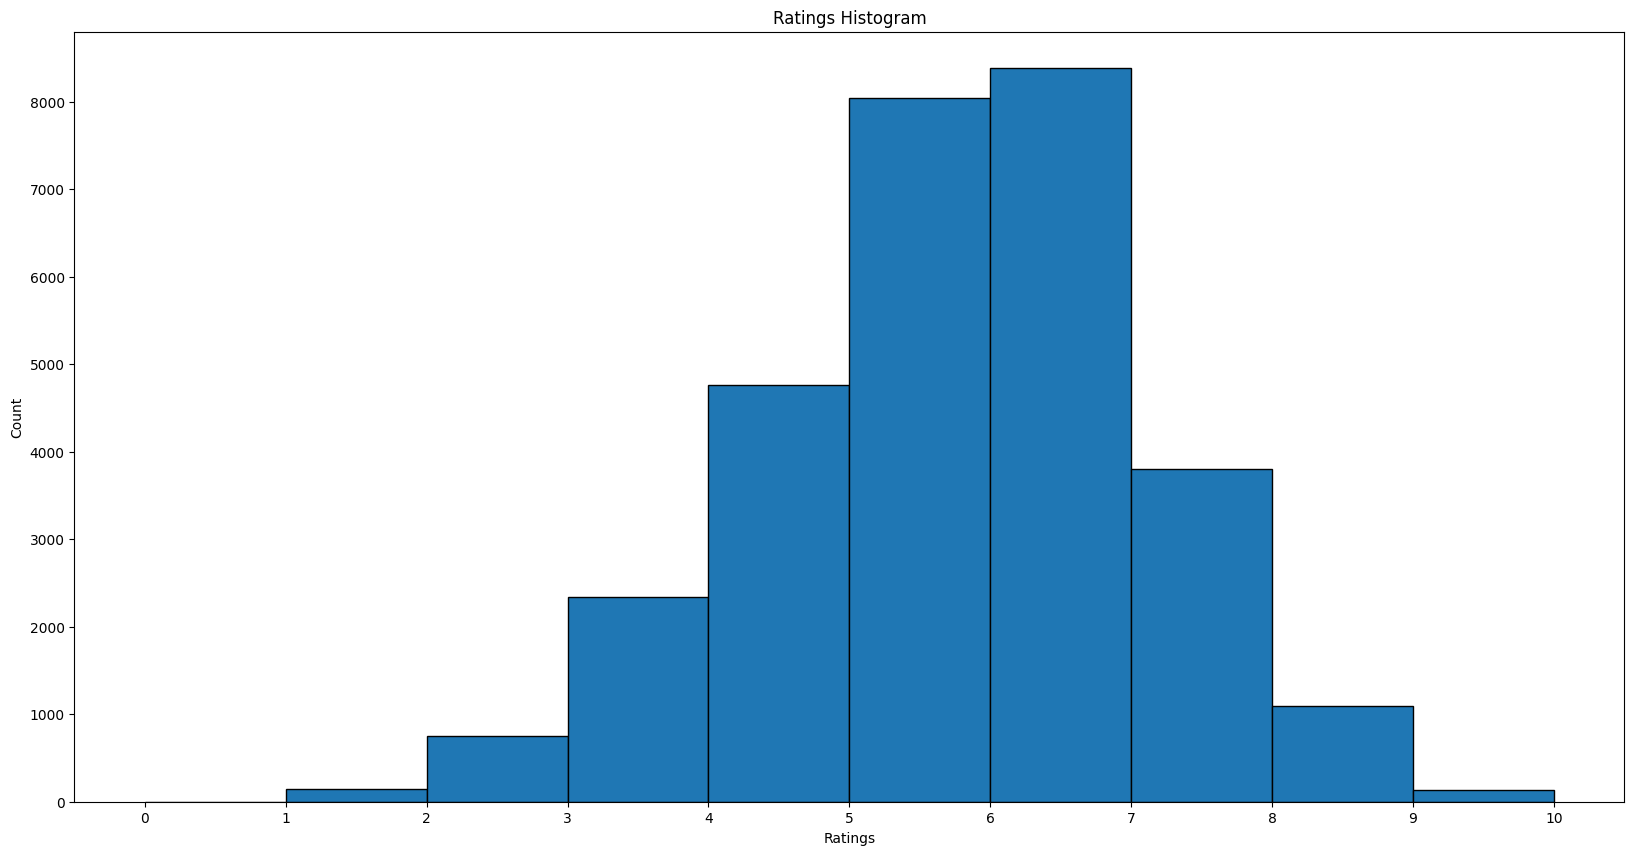

In [58]:
# adjust the figure size
plt.figure(figsize=(20,10))

# Create a hist chart
bin_edges = np.linspace(start=0, stop=10, num=11) # Create an array of bin edges that are evenly spaced between 0 and 10, with 10 bins
plt.hist(ratings, bins=bin_edges, edgecolor='black')

# Set the x-ticks and labels
ticks = np.arange(0, 11)
labels = ticks.astype(str)
plt.xticks(ticks, labels)

# Add labels and title
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Ratings Histogram')

# Show the plot
plt.show()

# Processed Data Analysis

We will be performing similar analysis above on the final processed data

In [59]:
# read datasdet using pandas
processed_data = pd.read_csv('../datasets/csv/processed_action_movie_data.csv')
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6648 entries, 0 to 6647
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      6648 non-null   int64  
 1   runtime   6648 non-null   int64  
 2   director  6648 non-null   object 
 3   star      6648 non-null   object 
 4   rating    6648 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 259.8+ KB


## Year

In [60]:
processed_data['year'].describe()

count    6648.000000
mean     2012.455325
std         5.921617
min      2000.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2023.000000
Name: year, dtype: float64

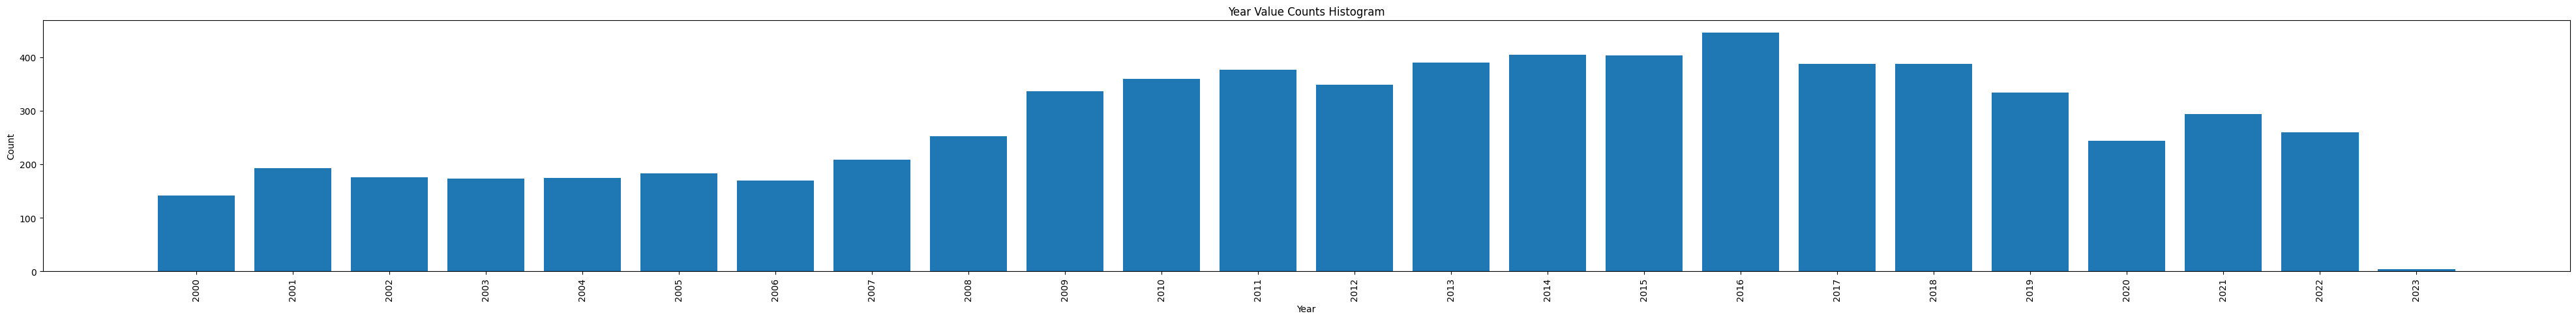

In [61]:
# Get year_counts
year_counts = processed_data['year'].value_counts().sort_index()

# Create a histogram of the year column
plt.figure(figsize=(50,5)) # adjust the figure size

# Create a bar chart with vertical x-axis labels
plt.bar(year_counts.index, year_counts.values)
plt.xticks(year_counts.index, rotation='vertical')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year Value Counts Histogram')

# Show the plot
plt.show()

## Runtime

In [62]:
processed_data['runtime'].describe()

count    6648.000000
mean       97.242329
std        22.203019
min         1.000000
25%        87.000000
50%        94.000000
75%       106.000000
max       700.000000
Name: runtime, dtype: float64

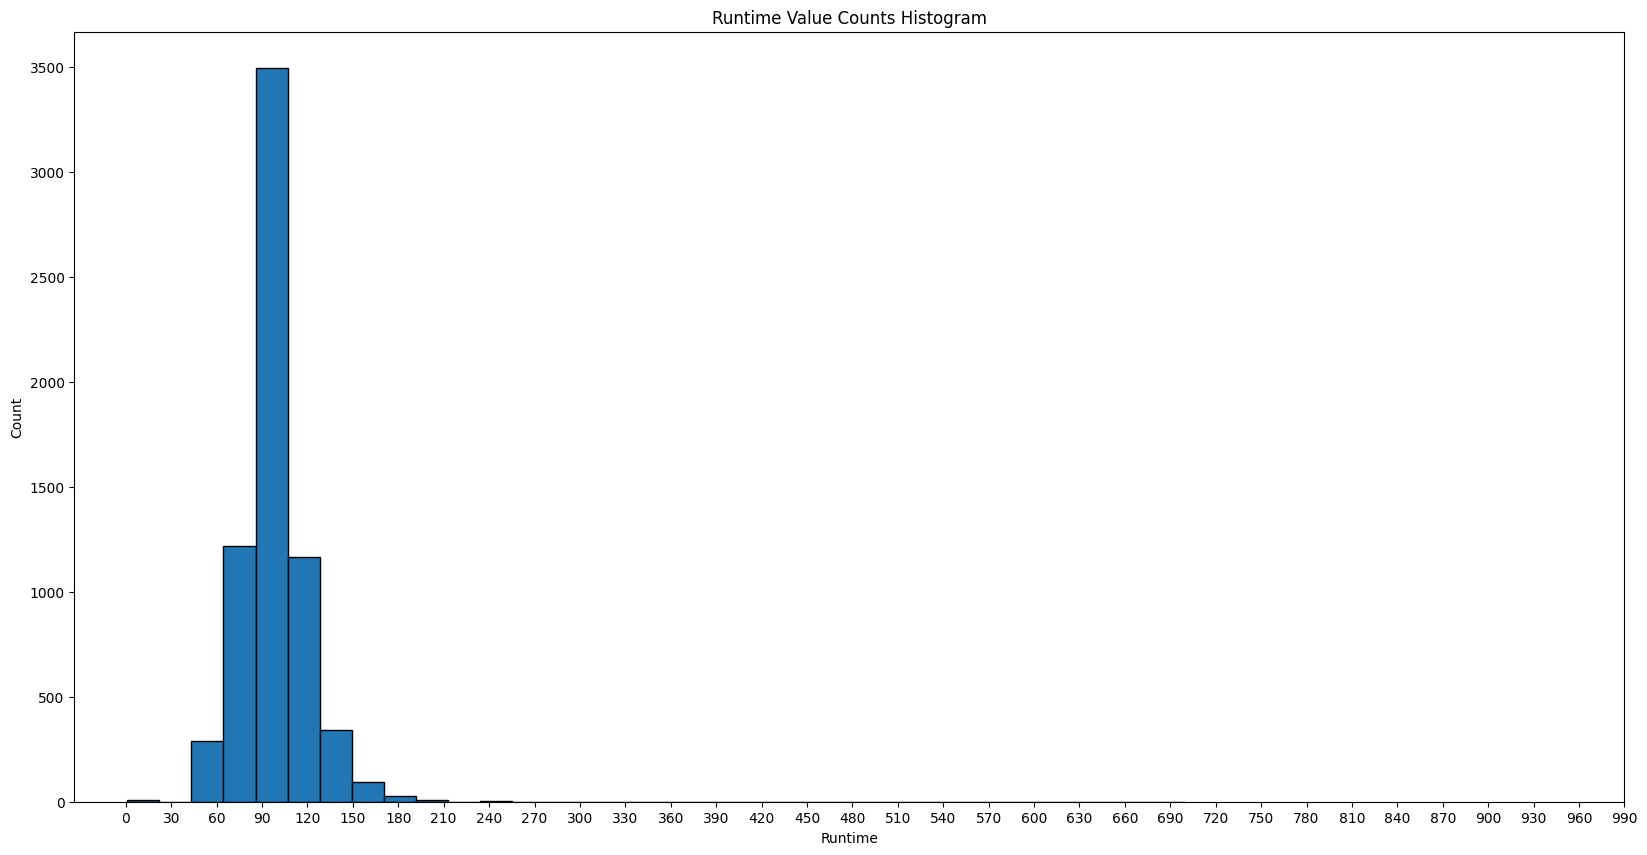

In [63]:
# adjust the figure size
plt.figure(figsize=(20,10)) 

# Create a hist chart
plt.hist(processed_data['runtime'], bins=33, edgecolor='black')

# Set the x-ticks and labels
ticks = np.arange(0, 1000, 30)
labels = ticks.astype(str)
plt.xticks(ticks, labels)

# Add labels and title
plt.xlabel('Runtime')
plt.ylabel('Count')
plt.title('Runtime Value Counts Histogram')

# Show the plot
plt.show()

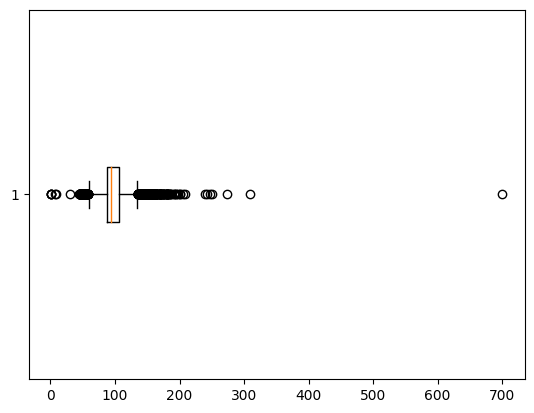

In [64]:
plt.boxplot(processed_data['runtime'], vert=0)
plt.show()

In [65]:
processed_data['runtime'].describe()

count    6648.000000
mean       97.242329
std        22.203019
min         1.000000
25%        87.000000
50%        94.000000
75%       106.000000
max       700.000000
Name: runtime, dtype: float64

In [78]:
# calculate IQR
q1 = processed_data['runtime'].quantile(0.25)
q3 = processed_data['runtime'].quantile(0.75)
iqr = q3 - q1

# define outlier threshold
outlier_threshold = q3 + 1.5 * iqr
outlier_threshold2 = q1 - 1.5 * iqr

# count number of outliers
num_outliers = len(processed_data[processed_data['runtime'] > outlier_threshold]) + len(processed_data[processed_data['runtime'] < outlier_threshold2])

# calculate percentage of outliers
pct_outliers = num_outliers / len(processed_data) * 100

print(f"Percentage of outliers: {pct_outliers:.2f}%")

Percentage of outliers: 7.81%


## Director(s)

In [66]:
processed_data['director'].describe()

count                    6648
unique                   4824
top       Michael Fredianelli
freq                       19
Name: director, dtype: object

In [67]:
# We want to see how many different types of counts are there for directors
processed_data['director'].value_counts().value_counts()

count
1     3898
2      570
3      161
4       75
5       44
6       25
7       21
8       11
9        7
10       2
11       2
12       2
14       2
17       1
13       1
16       1
19       1
Name: count, dtype: int64

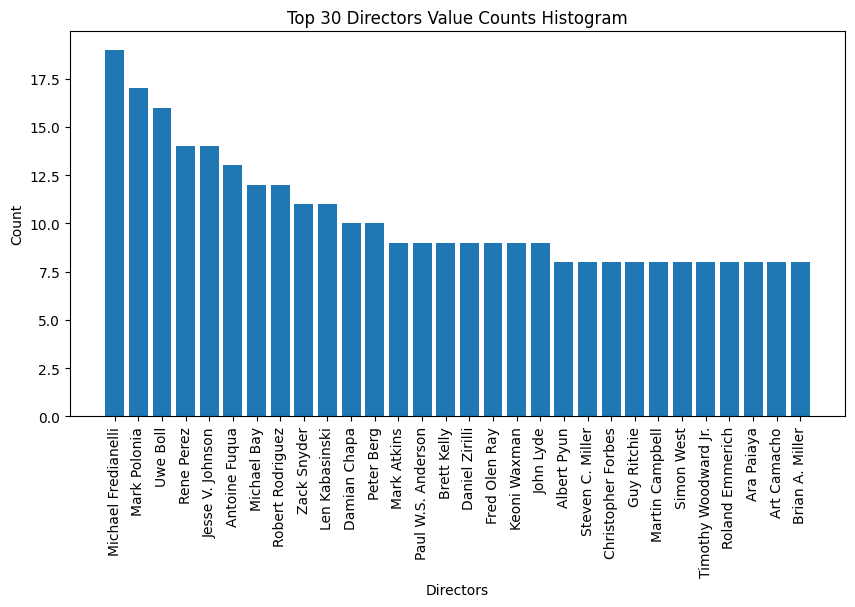

In [68]:
# Get director counts
director_counts = processed_data['director'].value_counts().sort_values(ascending=False)
director_counts = director_counts.head(30)

# adjust the figure size
plt.figure(figsize=(10,5))

# Create a histogram of the directors with vertical x-axis labels
plt.bar(director_counts.index, director_counts.values)
plt.xticks(director_counts.index, rotation='vertical')

# Add labels and title
plt.xlabel('Directors')
plt.ylabel('Count')
plt.title('Top 30 Directors Value Counts Histogram')

# Show the plot
plt.show()

In [69]:
director_ratings = processed_data.groupby('director')['rating'].mean()

# Sort directors by mean rating in descending order and get the top 30
top_directors = director_ratings.sort_values(ascending=False).head(30)

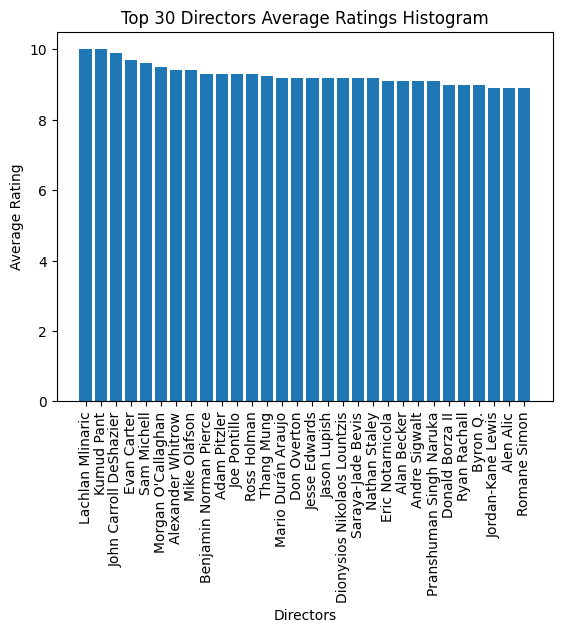

In [70]:
# Create a histogram of the directors with vertical x-axis labels
plt.bar(top_directors.index, top_directors.values)
plt.xticks(top_directors.index, rotation='vertical')

# Add labels and title
plt.xlabel('Directors')
plt.ylabel('Average Rating')
plt.title('Top 30 Directors Average Ratings Histogram')

# Show the plot
plt.show()

## Stars

In [71]:
processed_data['star'].describe()

count             6648
unique            4889
top       Bruce Willis
freq                28
Name: star, dtype: object

In [72]:
# We want to see how many different types of counts are there for stars
processed_data['star'].value_counts().value_counts()

count
1     4212
2      365
3      123
4       51
5       47
6       28
8       12
7       11
9       10
10       7
16       5
12       4
20       3
27       2
14       2
15       2
17       2
11       1
24       1
28       1
Name: count, dtype: int64

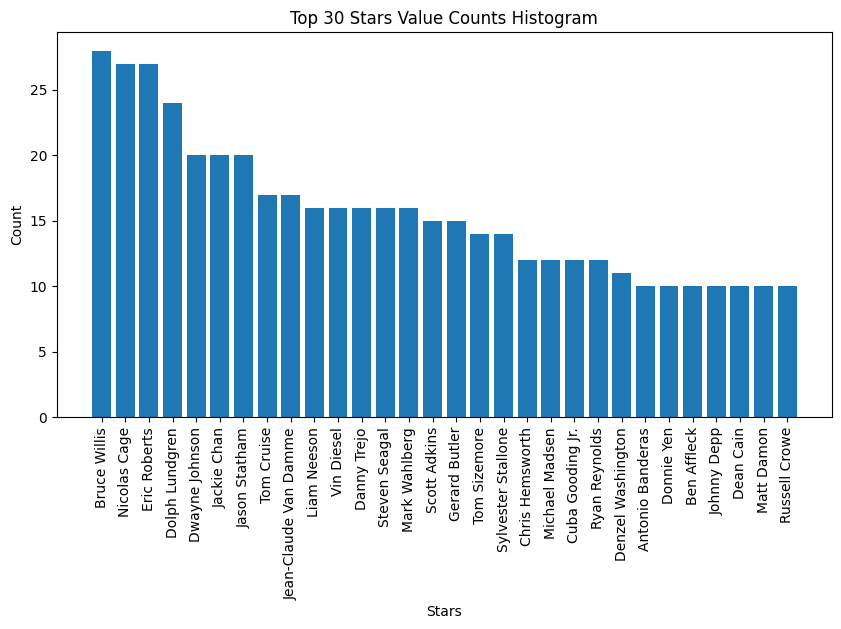

In [73]:
# Get stars counts
star_counts = processed_data['star'].value_counts().sort_values(ascending=False)
star_counts = star_counts.head(30)

# adjust the figure size
plt.figure(figsize=(10,5))

# # Create a histogram of the directors with vertical x-axis labels
plt.bar(star_counts.index, star_counts.values)
plt.xticks(star_counts.index, rotation='vertical')

# Add labels and title
plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('Top 30 Stars Value Counts Histogram')

# Show the plot
plt.show()

## Rating


In [74]:
processed_data['rating'].describe()

count    6648.000000
mean        5.393818
std         1.583277
min         1.100000
25%         4.200000
50%         5.500000
75%         6.500000
max        10.000000
Name: rating, dtype: float64

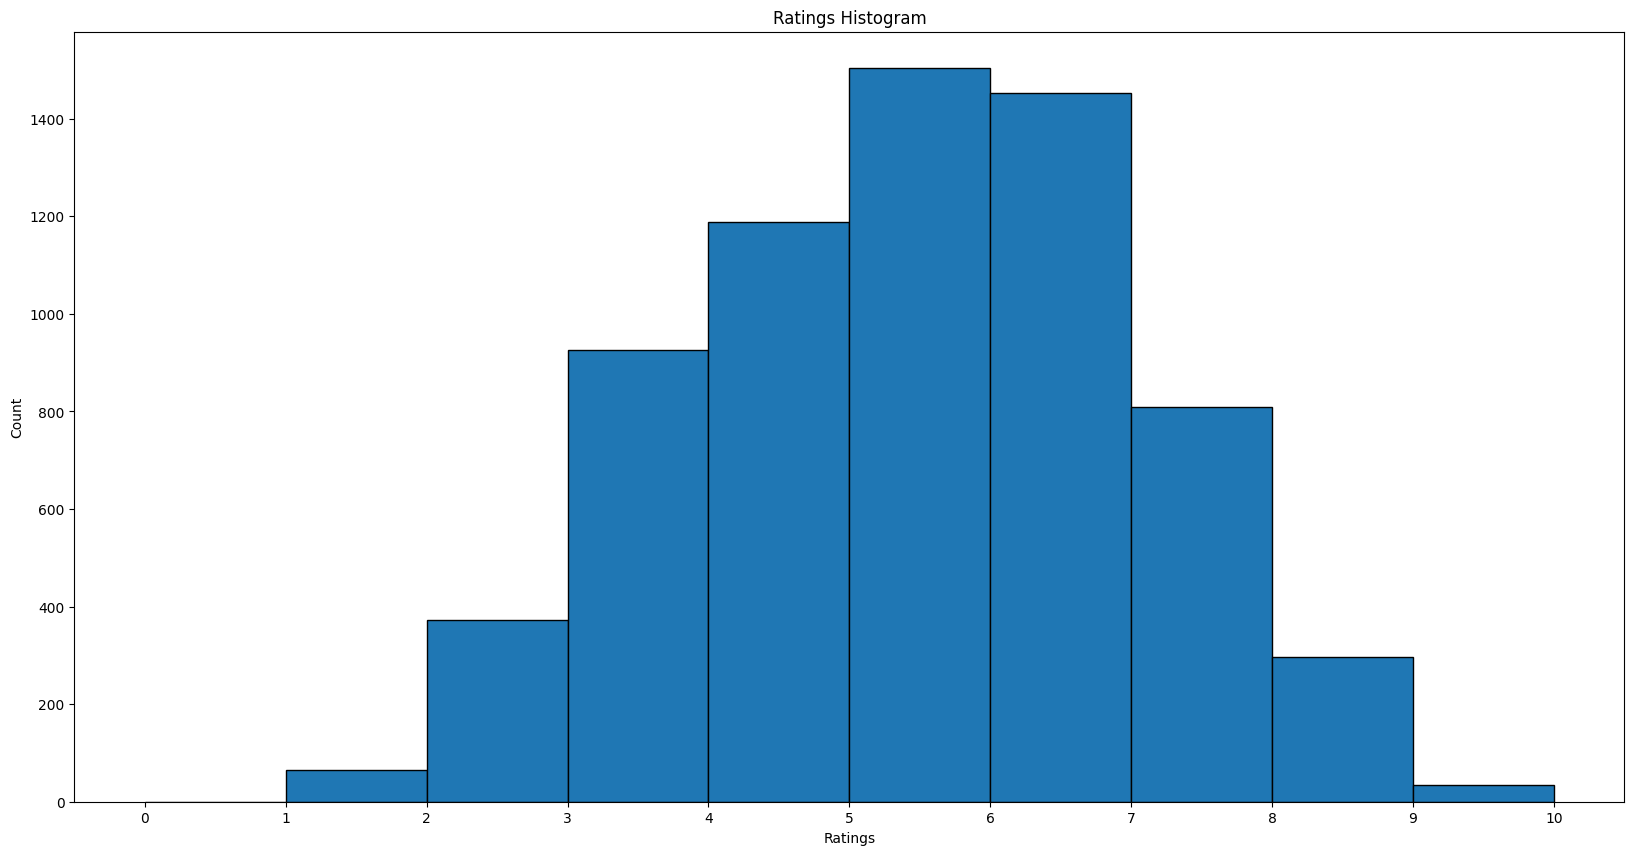

In [75]:
# adjust the figure size
plt.figure(figsize=(20,10))

# Create a hist chart
bin_edges = np.linspace(start=0, stop=10, num=11) # Create an array of bin edges that are evenly spaced between 0 and 10, with 10 bins
plt.hist(processed_data['rating'], bins=bin_edges, edgecolor='black')

# Set the x-ticks and labels
ticks = np.arange(0, 11)
labels = ticks.astype(str)
plt.xticks(ticks, labels)

# Add labels and title
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Ratings Histogram')

# Show the plot
plt.show()